In [ ]:
%%sql


In [2]:
import pandas as pd

# URL example – change to a specific Drive Finder or stats page
url = 'https://www.bcftoys.com/2024-ppd/'

# Try reading tables directly from the URL
tables = pd.read_html(url)

# Preview
print(f"Found {len(tables)} tables")
df = tables[0]
df.to_csv('bcf_drive_data.csv', index=False)

Found 1 tables


In [22]:

drive_data = pd.read_csv('../bcf_drive_data.csv', header=[0, 2])

drive_data = drive_data.drop(drive_data.index[[16, 33, 50, 67, 84, 101, 118, 135]])
drive_data = drive_data.drop(drive_data.columns[[0, 5, 7, 9, 11, 13, 14, 16, 18, 20, 22]], axis=1)
# drive_data = drive_data.dropna(how='any')
# print(drive_data.isnull().sum())  # Check remaining NaNs
# print(drive_data.shape)  # Rows and columns
drive_data.dropna(how="all", inplace=True)
drive_data

,1,2,3,4,6,8,10,12,15,17,19,21
,Team,Rec,FBS,NPD,OPD,OLD,OMD,OSD,DPD,DLD,DMD,DSD
0,Ohio State,14-2,14-2,2.29,3.55,2.47,3.54,4.79,1.26,.56,1.17,3.00
1,Army,12-2,11-2,1.94,3.60,2.23,3.60,5.05,1.67,-.14,1.58,3.93
2,Indiana,11-2,10-2,1.83,3.50,3.14,3.27,4.25,1.66,1.71,1.33,3.62
3,Ole Miss,10-3,9-3,1.78,2.98,2.55,2.93,3.72,1.20,1.08,1.18,1.78
4,Notre Dame,14-2,14-2,1.75,3.07,3.20,2.76,3.80,1.32,.49,1.41,2.46
...,...,...,...,...,...,...,...,...,...,...,...,...
145,Middle Tennessee,3-9,2-9,-1.79,1.57,.52,1.76,2.67,3.36,2.07,3.53,4.74
146,Tulsa,3-9,2-9,-1.91,1.21,1.00,1.19,1.55,3.12,2.73,2.67,4.68
147,Southern Mississippi,1-11,0-11,-2.45,1.10,.73,1.04,2.40,3.55,2.28,3.63,4.14


In [28]:
df = pd.read_csv('../python_data/Drive_DATA_cleanv1.csv')

df

,Team,Record,FBS_Record,NPD,OPD,OLD,OMD,OSD,DPD,DLD,DMD,DSD,Wins,Losses,FBS_Wins,FBS_Losses
0,Ohio State,14-2,14-2,2.29,3.55,2.47,3.54,4.79,1.26,0.56,1.17,3.00,14,2,14,2
1,Army,12-2,11-2,1.94,3.60,2.23,3.60,5.05,1.67,-0.14,1.58,3.93,12,2,11,2
2,Indiana,11-2,10-2,1.83,3.50,3.14,3.27,4.25,1.66,1.71,1.33,3.62,11,2,10,2
3,Ole Miss,10-3,9-3,1.78,2.98,2.55,2.93,3.72,1.20,1.08,1.18,1.78,10,3,9,3
4,Notre Dame,14-2,14-2,1.75,3.07,3.20,2.76,3.80,1.32,0.49,1.41,2.46,14,2,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Middle Tennessee,3-9,2-9,-1.79,1.57,0.52,1.76,2.67,3.36,2.07,3.53,4.74,3,9,2,9
130,Tulsa,3-9,2-9,-1.91,1.21,1.00,1.19,1.55,3.12,2.73,2.67,4.68,3,9,2,9
131,Southern Mississippi,1-11,0-11,-2.45,1.10,0.73,1.04,2.40,3.55,2.28,3.63,4.14,1,11,0,11
132,Purdue,1-11,0-11,-2.69,1.14,1.71,0.87,3.00,3.84,3.65,3.37,5.61,1,11,0,11


Random Forest R² score: 0.95


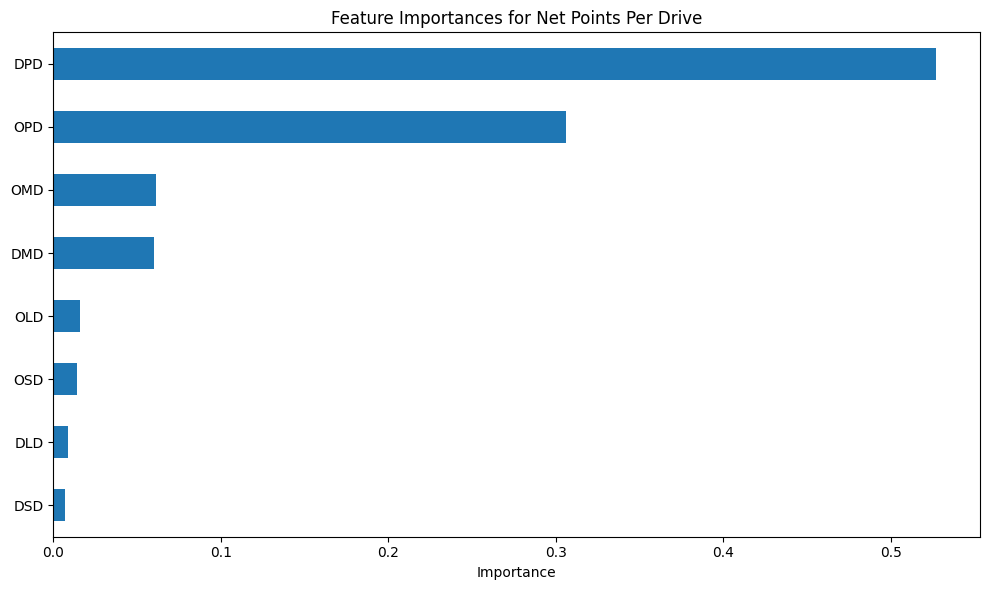

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# AI Cleaning/ restructure of data (Record, FBS_Record)
df = pd.read_csv('../python_data/Drive_DATA_cleanv1.csv')

# Drop non-modeling columns
columns_to_drop = ['Record', 'FBS_Record']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

# Select features and target
features = ["OPD", "DPD", "OLD", "DLD", "OMD", "DMD", "OSD", "DSD"]
target = "NPD"

# Drop missing values
df_model = df.dropna(subset=features + [target])
X = df_model[features]
y = df_model[target]

# Split and train Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest R² score: {r2:.2f}")

# Plot feature importance
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)
plt.figure(figsize=(10, 6))
importances.plot(kind='barh')
plt.title("Feature Importances for Net Points Per Drive")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [15]:
df

,Rank,Team,NPD,OPD,DPD,OLD,DLD,OMD,DMD,OSD,DSD,Wins,Losses,FBS_Wins,FBS_Losses,OffenseScore,DefenseScore
0,0,Ohio State,2.29,3.55,2.47,3.54,4.79,1.26,0.56,1.17,3.00,14,2,14,2,3.55,-2.47
1,1,Army,1.94,3.60,2.23,3.60,5.05,1.67,-0.14,1.58,3.93,12,2,11,2,3.60,-2.23
2,2,Indiana,1.83,3.50,3.14,3.27,4.25,1.66,1.71,1.33,3.62,11,2,10,2,3.50,-3.14
3,3,Ole Miss,1.78,2.98,2.55,2.93,3.72,1.20,1.08,1.18,1.78,10,3,9,3,2.98,-2.55
4,4,Notre Dame,1.75,3.07,3.20,2.76,3.80,1.32,0.49,1.41,2.46,14,2,14,2,3.07,-3.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,145,Middle Tennessee,-1.79,1.57,0.52,1.76,2.67,3.36,2.07,3.53,4.74,3,9,2,9,1.57,-0.52
130,146,Tulsa,-1.91,1.21,1.00,1.19,1.55,3.12,2.73,2.67,4.68,3,9,2,9,1.21,-1.00
131,147,Southern Mississippi,-2.45,1.10,0.73,1.04,2.40,3.55,2.28,3.63,4.14,1,11,0,11,1.10,-0.73
132,148,Purdue,-2.69,1.14,1.71,0.87,3.00,3.84,3.65,3.37,5.61,1,11,0,11,1.14,-1.71


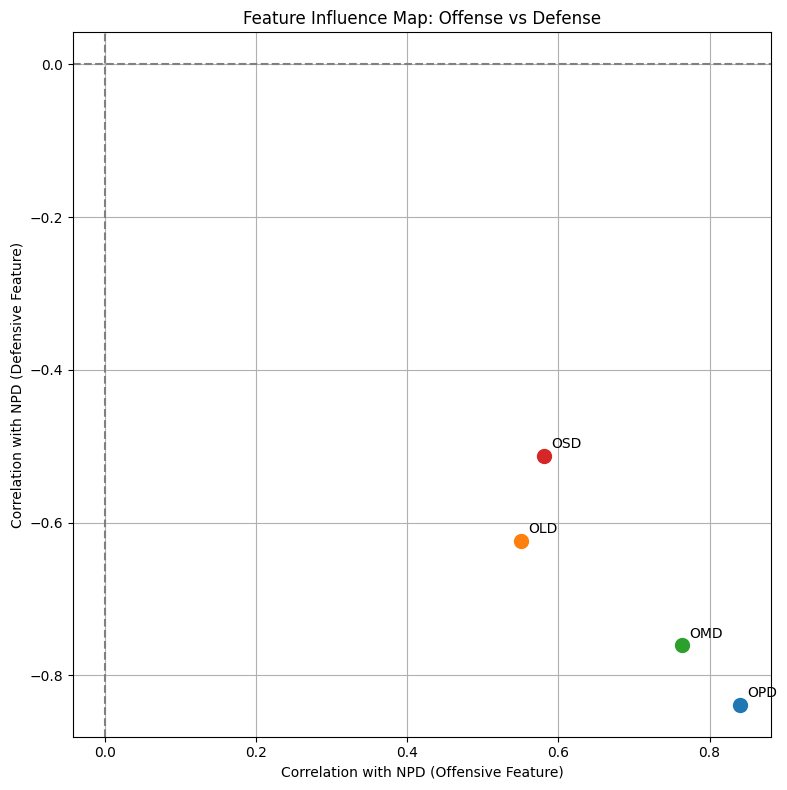

In [30]:
import matplotlib.pyplot as plt

# Define features and target
features = ["OPD", "DPD", "OLD", "DLD", "OMD", "DMD", "OSD", "DSD"]
target = "NPD"

# Drop missing values
df_model = df.dropna(subset=features + [target])

# Calculate correlations with NPD
correlations = df_model[features + [target]].corr()[target].drop(target)

# Match each offensive feature with its defensive counterpart
offense_features = ["OPD", "OLD", "OMD", "OSD"]
defense_features = ["DPD", "DLD", "DMD", "DSD"]

# Extract correlation values
off_corr = [correlations[feat] for feat in offense_features]
def_corr = [correlations[feat] for feat in defense_features]

# Plot
plt.figure(figsize=(8, 8))
for i in range(len(offense_features)):
    plt.scatter(off_corr[i], def_corr[i], s=100)
    plt.text(off_corr[i] + 0.01, def_corr[i] + 0.01, offense_features[i], fontsize=10)

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Correlation with NPD (Offensive Feature)")
plt.ylabel("Correlation with NPD (Defensive Feature)")
plt.title("Feature Influence Map: Offense vs Defense")
plt.grid(True)
plt.tight_layout()
plt.show()

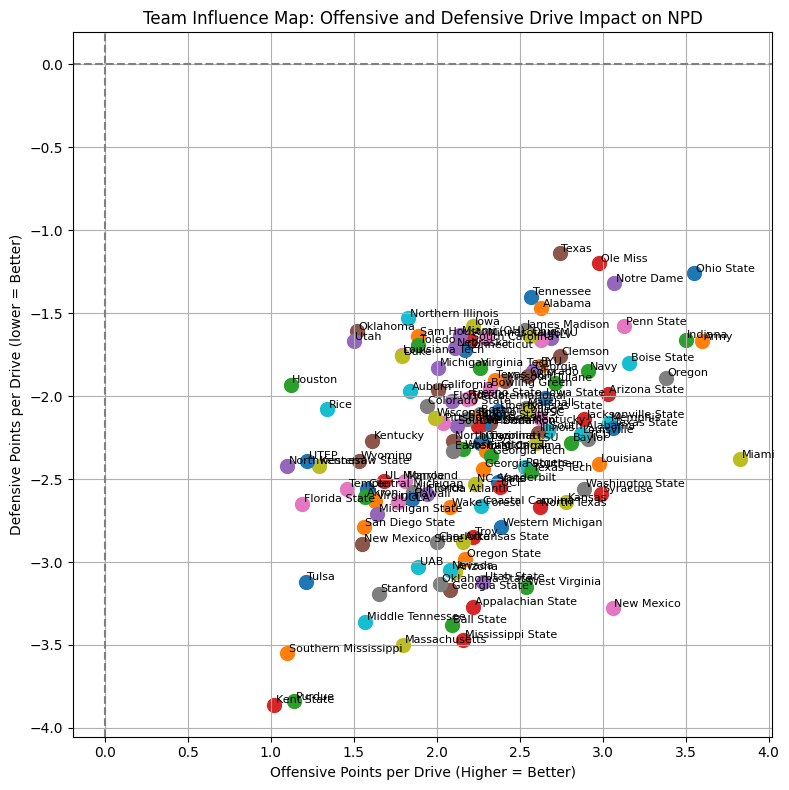

In [43]:
import matplotlib.pyplot as plt
# Scatter plot: team-level influence
plt.figure(figsize=(8, 8))

# Plot each team
for i in range(len(df)):
    x = (df.loc[i, "OPD"])
    y = -df.loc[i, "DPD"]  # negative because lower DPD is better
    plt.scatter(x, y, s=100)
    plt.text(x + 0.01, y + 0.01, df.loc[i, "Team"], fontsize=8)

# Axes and layout
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Offensive Points per Drive (Higher = Better)")
plt.ylabel("Defensive Points per Drive (lower = Better)")
plt.title("Team Influence Map: Offensive and Defensive Drive Impact on NPD")
plt.grid(True)
plt.tight_layout()
plt.show()

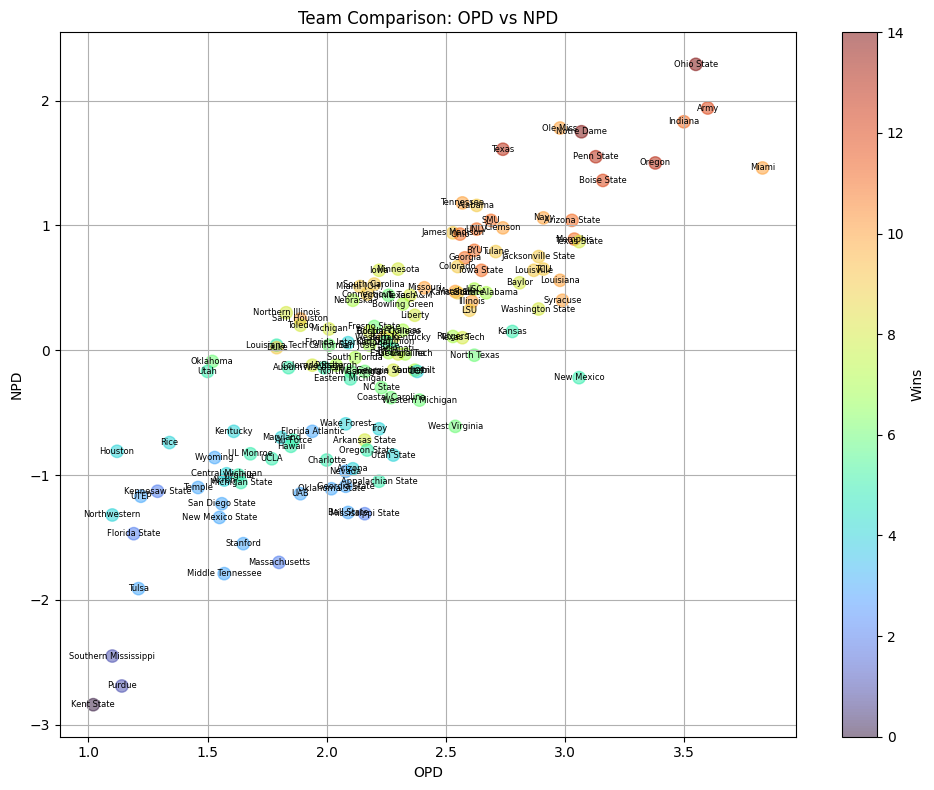

In [42]:
# Team Comparison: OPD V NPD
import numpy as np
dd = pd.read_csv('../python_data/Drive_DATA_cleanv1.csv')
plt.figure(figsize=(10, 8))
plot = plt.scatter((dd['OPD']), (dd['NPD']), c=dd['Wins'], cmap='turbo', s=80,  alpha=0.5)  # base points for scale
cbar = plt.colorbar(plot)
cbar.set_label('Wins')

# Add team name as text labels
for _, row in dd.iterrows():
    plt.text(row['OPD'], row['NPD'], row['Team'], fontsize=6, ha='center', va='center')


plt.xlabel('OPD')
plt.ylabel('NPD')
plt.title('Team Comparison: OPD vs NPD')
plt.grid(True)
plt.tight_layout()
plt.show()

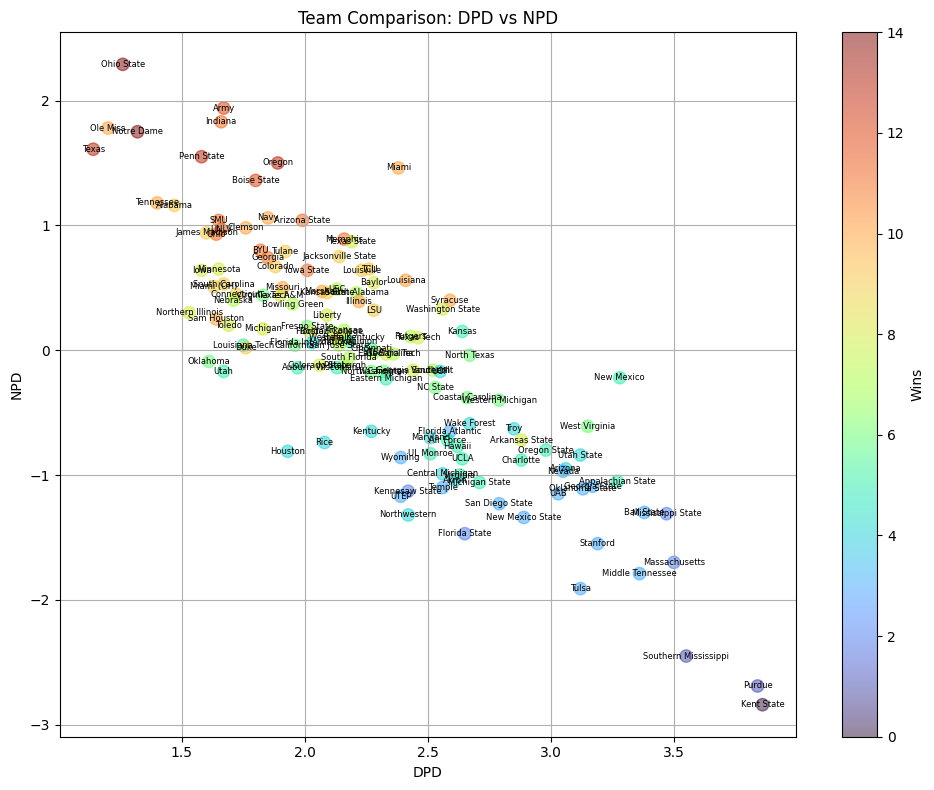

In [46]:
# Team Comparison: DPD V NPD
import numpy as np
dd = pd.read_csv('../python_data/Drive_DATA_cleanv1.csv')
plt.figure(figsize=(10, 8))
plot = plt.scatter((dd['DPD']), (dd['NPD']), c=dd['Wins'], cmap='turbo', s=80,  alpha=0.5)  # base points for scale
cbar = plt.colorbar(plot)
cbar.set_label('Wins')

# Add team name as text labels
for _, row in dd.iterrows():
    plt.text(row['DPD'], row['NPD'], row['Team'], fontsize=6, ha='center', va='center')


plt.xlabel('DPD')
plt.ylabel('NPD')
plt.title('Team Comparison: DPD vs NPD')
plt.grid(True)
plt.tight_layout()
plt.show()